In [406]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline

144
809326


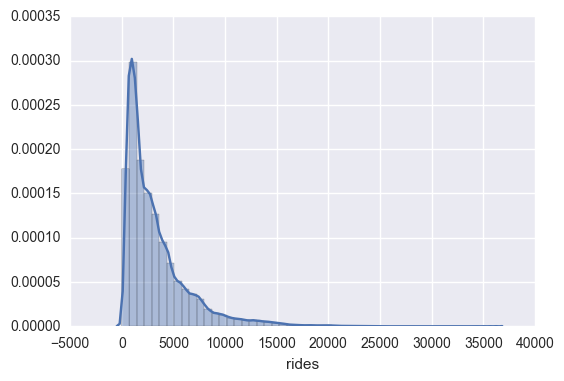

In [330]:
rules = {
    'stop_name' : 'first',
    'station_descriptive_name': 'first',
    'location' : 'first',
    'ada' : 'max',
    'red' : 'max',
    'blue' : 'max',
    'green' : 'max',
    'brown' : 'max',
    'orange' : 'max',
    'pink' : 'max',
    'yellow' : 'max',
    'purple' : 'max',
    'pexp' : 'max'
}
rides = pd.read_csv("CTA_rides.csv", keep_default_na=False, na_values=[""]).rename(columns=str.lower)
stations = pd.read_csv("CTA_stops.csv", keep_default_na=False, na_values=[""]).rename(columns=str.lower)
stations.rename(columns = {'p': 'purple', 'g': 'green', 'y': 'yellow', 'brn': 'brown', 'o': 'orange', 'pnk': 'pink'}, inplace = True)
stations = stations.groupby('map_id',as_index=False).agg(rules)

print len(stations)
print len(rides)
station_days = pd.merge(left=stations, right=rides, left_on='map_id', right_on='station_id')
sb.distplot(station_days['rides'])

In [821]:
# This is very slow... like around 5 mins slow... Would be curious to learn of a faster way
def label_color(colors):
    foundColors = colors[colors == True] 
    colorCount = foundColors.size
    if colorCount == 1 :
        return foundColors.index[0]
    if colorCount == 2 and colors['purple'] and colors['pexp'] :
        return 'purple'
    elif colorCount >= 2 :
        return 'multiple'
df = station_days[station_days['line_color'].isnull()]
# df = df[['red', 'blue', 'green', 'brown', 'purple', 'pexp', 'pink', 'orange', 'yellow']][:50]
print df.shape
colorCols = station_days[['red', 'blue', 'green', 'brown', 'purple', 'pexp', 'pink', 'orange', 'yellow']]
# df.apply(lambda x: label_color(x), axis=1)
station_days['line_color'] = colorCols.apply(lambda x: label_color(x), axis=1)

(806292, 28)


In [693]:
# These are mostly for convience and easier exploration later on
datetimes = pd.to_datetime(station_days['date'],infer_datetime_format=True)
station_days['datetime'] = pd.to_datetime(station_days['date'],infer_datetime_format=True)
station_days['day_of_week'] = datetimes.dt.weekday_name
station_days['month_name'] = datetimes.dt.strftime('%B')
station_days['month_num'] = datetimes.dt.month
station_days['year'] = datetimes.dt.year
station_days['week'] = datetimes.dt.week
station_days['day_of_year'] = datetimes.dt.dayofyear
station_days['weekday_num'] = datetimes.dt.dayofweek


In [750]:
# Busiest single day was June 28,th 2015... 36,000!?!
df = station_days
# df.groupby('rides', as_index=False).last()
# df[df.rides == 705576]
df['rides'].argmax()
df.ix[df['rides'].idxmax()]

map_id                                                    41320
brown                                                      True
pexp                                                       True
station_descriptive_name    Belmont (Red, Brown & Purple Lines)
yellow                                                    False
pink                                                      False
blue                                                      False
purple                                                    False
green                                                     False
location                                 (41.939751, -87.65338)
ada                                                        True
orange                                                    False
stop_name                                  Belmont (95th-bound)
red                                                        True
station_id                                                41320
stationname                             

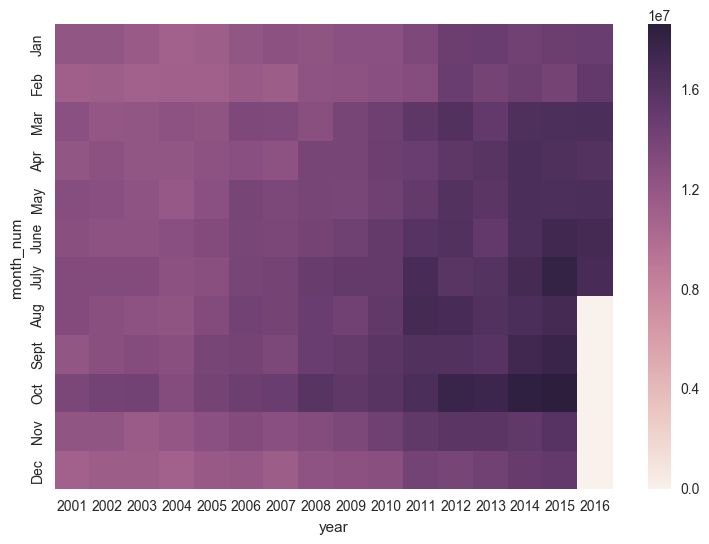

In [751]:
# import datetime as dt

df = station_days

rides_pivot = pd.pivot_table(df, index='month_num', values='rides', columns='year', aggfunc=sum).fillna(0)
# stop_rides.pivot("month_name", "year", "rides").fillna(0)
# print rides_pivot.sort_index(level='year')
# rides_pivot['month_name']
# print rides_pivot.head()
sb.set_context("notebook")
a4_dims = (9, 6)
fig, ax = plt.subplots(figsize=a4_dims)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
sb.heatmap(rides_pivot, yticklabels=months, ax=ax)
# sb.boxplot(x="month_name", y="rides", data=stop_rides)

# sb.violinplot(x="month_name", y="rides", data=stop_rides)

# rides_pivot

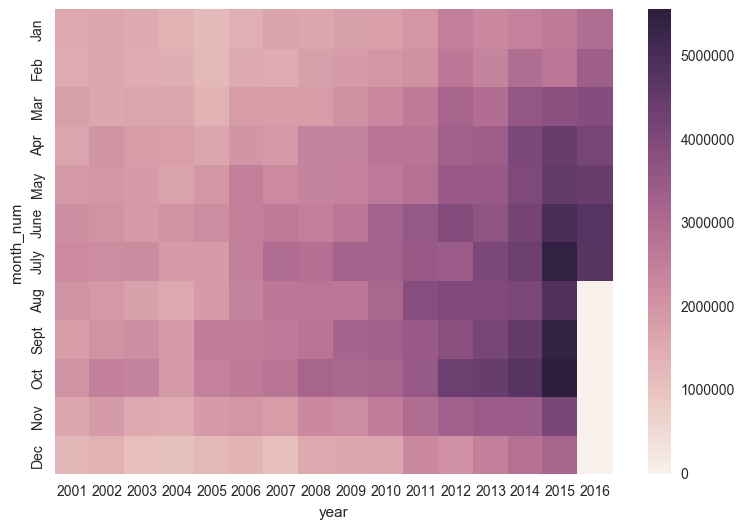

In [752]:
# import datetime as dt

df = station_days[station_days.rides > 10000]

rides_pivot = pd.pivot_table(df, index='month_num', values='rides', columns='year', aggfunc=sum).fillna(0)
# stop_rides.pivot("month_name", "year", "rides").fillna(0)
# print rides_pivot.sort_index(level='year')
# rides_pivot['month_name']
# print rides_pivot.head()
sb.set_context("notebook")
a4_dims = (9, 6)
fig, ax = plt.subplots(figsize=a4_dims)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
sb.heatmap(rides_pivot, yticklabels=months, ax=ax)
# sb.boxplot(x="month_name", y="rides", data=stop_rides)

# sb.violinplot(x="month_name", y="rides", data=stop_rides)

# rides_pivot

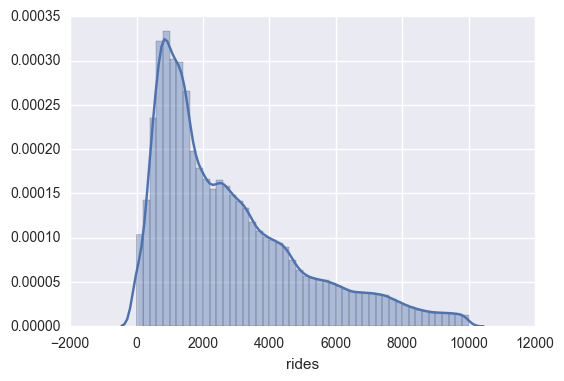

In [334]:
df = station_days[station_days.rides < 10000]

rides_pivot = pd.pivot_table(df, index='month_num', values='rides', columns='year', aggfunc=np.sum).fillna(0)
# station_days.pivot("month_name", "year", "rides").fillna(0)
# print rides_pivot.sort_index(level='year')
# rides_pivot['month_name']
# print rides_pivot.head()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
# year_month_cluster = sb.heatmap(rides_pivot, yticklabels=months)
sb.distplot(df['rides'])


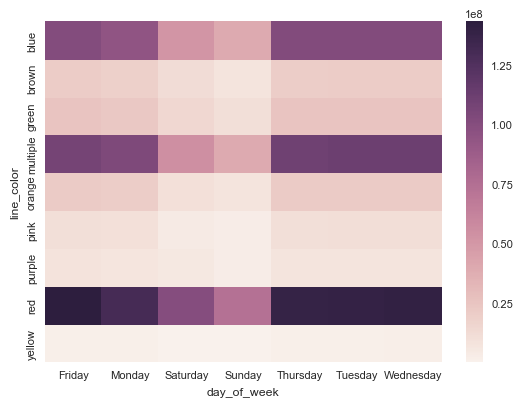

In [824]:

rides_pivot = pd.pivot_table(station_days, index='line_color', values='rides', columns='day_of_week', aggfunc=np.sum).fillna(0)
sb.heatmap(rides_pivot)

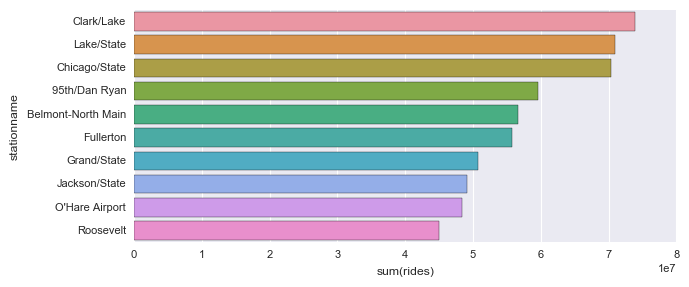

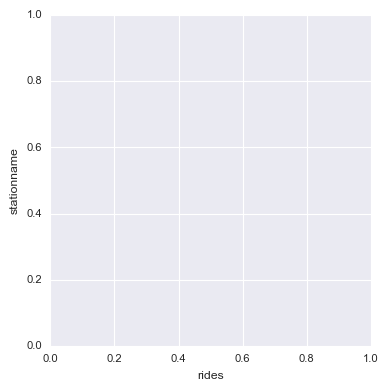

In [829]:
# There was no pink line before 2006 so I was trying to figure out what was going on here... turns out the stations have been around for ever
p = {"red": "#d92425", "blue":"#3d7db1", "green":"#52A94F", "purple": "#95529C", 'pink':'#EE87BD', 'yellow':'#F3F13C', 'brown':'#A15831', 'multiple': 'grey', 'orange': '#F2800D'}

sb.set_palette(sb.color_palette("Set1", n_colors=9, desat=.9))
# sb.set_palette(p)
aggs= {
#     'rides' : {
#         'total_rides' : 'sum'
#     },
    'rides' : 'sum'
}
cats = ['stationname', 'line_color', 'station_id']
grouped_stations = station_days[station_days.year < 2016].groupby(cats, as_index=False).agg(aggs)
# print grouped_stations
top_rides_per_station = grouped_stations.sort_values(['rides'], ascending=False)[:10]
# print top_rides_per_station
# sortedMapids = top_rides_per_station['line_color']
a4_dims = (7, 3)
fig, ax = plt.subplots(figsize=a4_dims)
# fig.suptitle("Busiest pink line stations before 2006")
sb.factorplot(ax=ax, x='rides', y=cat, orient="h", data=top_rides_per_station, kind='bar', estimator=sum)

# grouped_stations = station_days[station_days.line_color == "pink"].groupby(cat, as_index=False).agg(aggs)
# print grouped_stations
# top_rides_per_station = grouped_stations.sort_values(['rides'], ascending=False)[:10]
# sb.factorplot(x='rides', y=cat, orient="h", data=top_rides_per_station, estimator=sum, color='teal', kind='bar')

# g = sb.FacetGrid(station_days, col="line_color", col_wrap=3)

# g = g.map(sb.barplot, "rides")
# top_rides_per_station.describe
# sb.factorplot(x='rides', y=cat, orient="h", data=top_rides_per_station, kind='bar', estimator=sum, color='salmon')


In [822]:
df = station_days[station_days['line_color'].isnull()]
df.shape
df

,map_id,brown,pexp,station_descriptive_name,yellow,pink,blue,purple,green,location,ada,orange,stop_name,red,station_id,stationname,date,daytype,rides,datetime,day_of_week,month_name,year,month_num,line_color,week,day_of_year,weekday_num


(65440, 1)
                                                                                             rides
stationname line_color weekday_num week month_num ada   location                station_id        
18th        pink       0           1    1         True  (41.857908, -87.669147) 40830        802.0
                                        12        True  (41.857908, -87.669147) 40830       1076.0
                                   2    1         True  (41.857908, -87.669147) 40830       1110.0
                                   3    1         True  (41.857908, -87.669147) 40830        963.0
                                   4    1         True  (41.857908, -87.669147) 40830       1054.0
                                   5    1         True  (41.857908, -87.669147) 40830       1108.0
                                        2         True  (41.857908, -87.669147) 40830       1510.0
                                   6    2         True  (41.857908, -87.669147) 40830       1384.0

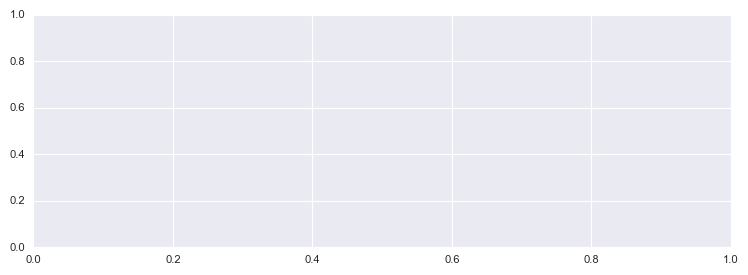

In [838]:
p = {"red": "#d92425", "blue":"#3d7db1", "green":"#52A94F", "purple": "#95529C", 'pink':'#EE87BD', 'yellow':'#F3F13C', 'brown':'#A15831', 'multiple': 'grey', 'orange': '#F2800D'}
aggs= {
    'rides' : 'median'
}
# sb.set_palette(sb.color_palette("Set1", n_colors=9, desat=.9))
# station_name
# sb.set_palette(p)
# grouped_stations = station_days.groupby(['stationname', 'line_color'], as_index=False).agg(aggs)

cats = ['stationname','line_color', 'weekday_num', 'week', 'month_num', 'ada', 'location', 'station_id']
grouped_stations = station_days[station_days.year < 2016].groupby(cats).agg(aggs)
print grouped_stations.shape
print grouped_stations
# df = grouped_stations.groupby('month_num', as_index=False).agg('median')
a4_dims = (9, 3)
# sb.distplot(grouped_stations['rides'])
fig, ax = plt.subplots(figsize=a4_dims)
# g = sb.factorplot(ax=ax, y='rides', x='month_num', palette=p, orient='v', data=grouped_stations, kind="point", estimator=np.mean, hue='line_color')
# grouped_stations.to_csv('station_days.csv')
# sb.distplot(grouped_stations['rides'])
# sb.pairplot(grouped_stations)
# top_rides_per_station = grouped_stations.sort_values(['rides'], ascending=False)[:10]
# g = sb.FacetGrid(station_days, col="line_color", col_wrap=3)
# pd.set_option('display.max_columns', 500)
# station_days[station_days.station_id == 40460].head()

In [ ]:
p = {"red": "#d92425", "blue":"#3d7db1", "green":"#52A94F", "purple": "#95529C", 'pink':'#EE87BD', 'yellow':'#F3F13C', 'brown':'#A15831', 'multiple': 'grey', 'orange': '#F2800D'}

sb.set_palette(sb.color_palette("Set1", n_colors=9, desat=.9))
# sb.set_palette(p)
aggs= {
    'rides' : 'sum',
}
grouped_stations = station_days.groupby('month_name', as_index=False).agg(aggs)
# print grouped_stations
# top_rides_per_station = grouped_stations.sort_values(['rides'], ascending=False)
# print top_rides_per_station
# sortedMapids = top_rides_per_station['line_color']
sb.factorplot(x='rides', y='month_name', orient="h", data=grouped_stations, kind='bar', estimator=sum)
# top_rides_per_station.describe


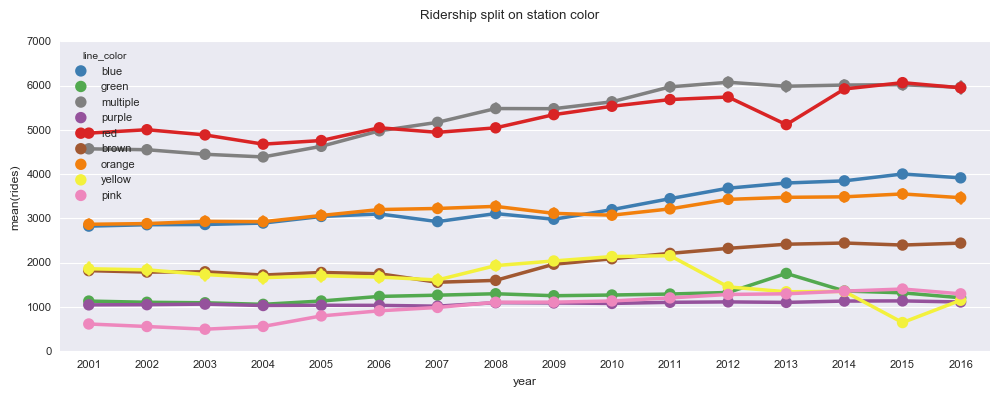

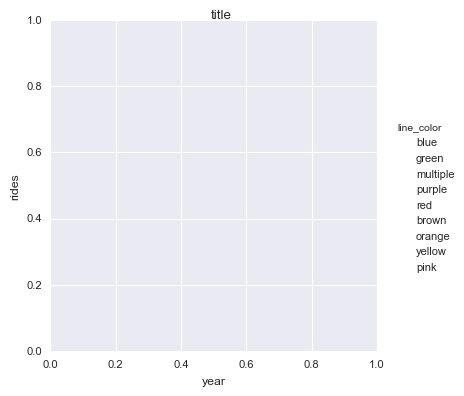

In [830]:
p = {"red": "#d92425", "blue":"#3d7db1", "green":"#52A94F", "purple": "#95529C", 'pink':'#EE87BD', 'yellow':'#F3F13C', 'brown':'#A15831', 'multiple': 'grey', 'orange': '#F2800D'}

rules = {
    'rides' : 'mean'
}
df = station_days
df = station_days
categories = ['year', 'line_color']
group_by_month = station_days.groupby(categories, as_index=False).agg(rules)
# print group_by_month
sb.set_context("paper")
a4_dims = (12, 4)
fig, ax = plt.subplots(figsize=a4_dims)
fig.suptitle("Ridership split on station color")
g = sb.factorplot(ax=ax,y='rides', palette=p, x='year', orient='v', data=station_days, kind="point", hue='line_color', estimator=np.mean)
g.fig.suptitle('title')
# sb.factorplot(""  y=category, x='rides', orient='h', data=group_by_month, kind="count", hue='color_line')